In [92]:
# Importing Pandas for loading
import pandas as pd

# Loading the dataset

In [93]:
# Loading the Data
df = pd.read_csv(r"C:\Users\utsaj haridwari\Documents\Internship\Lets Grow More\Tasks\Task 6\iris.csv")
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# EDA - Data Summarization

In [94]:
df.shape

(150, 5)

In [95]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [96]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [98]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [99]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [100]:
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Visualizing the data

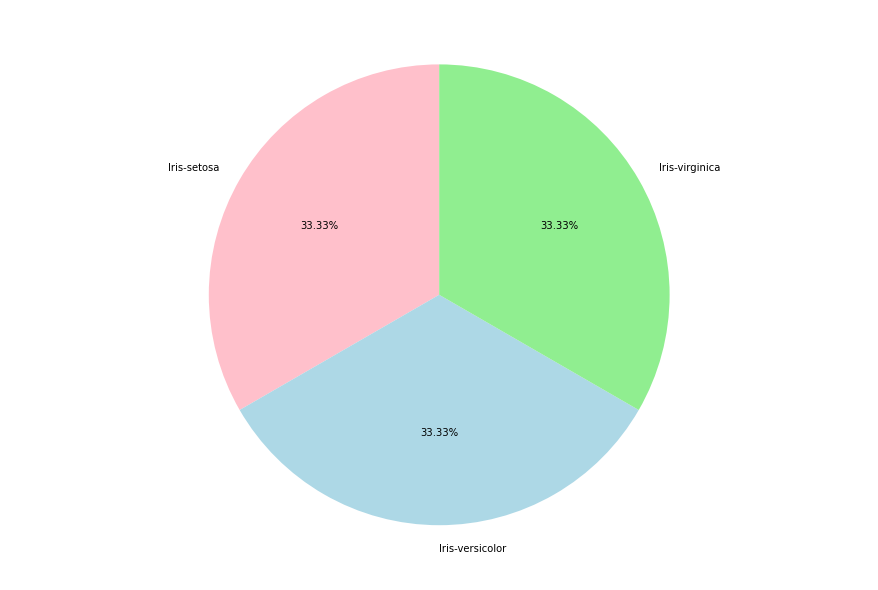

In [122]:
import matplotlib.pyplot as plt

#Visualizing the data with Pie chart
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
colors = ['pink','lightblue','lightgreen']
sp = df['Species'].unique()
ct = df['Species'].value_counts().tolist()
ax.pie(ct, labels = sp, autopct='%1.2f%%', colors=colors, startangle=90)
plt.show()

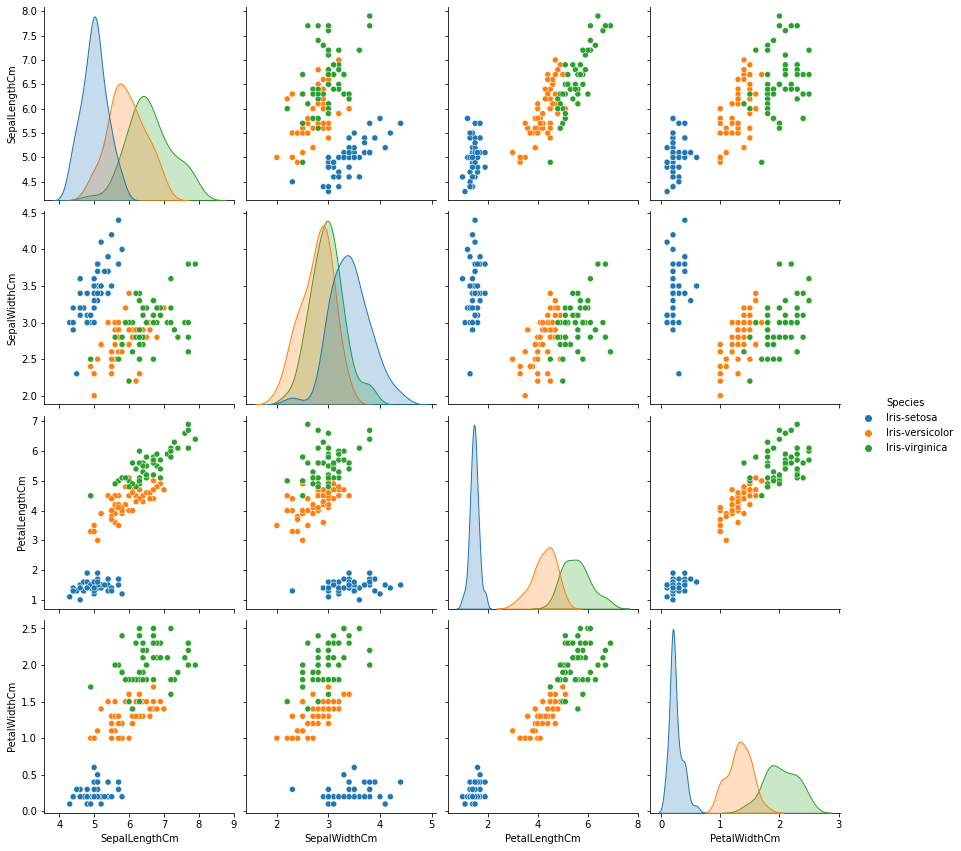

In [102]:
import seaborn as sns

# Visualizing as pairplot
sns.pairplot(df, hue='Species', height=3)
plt.show()

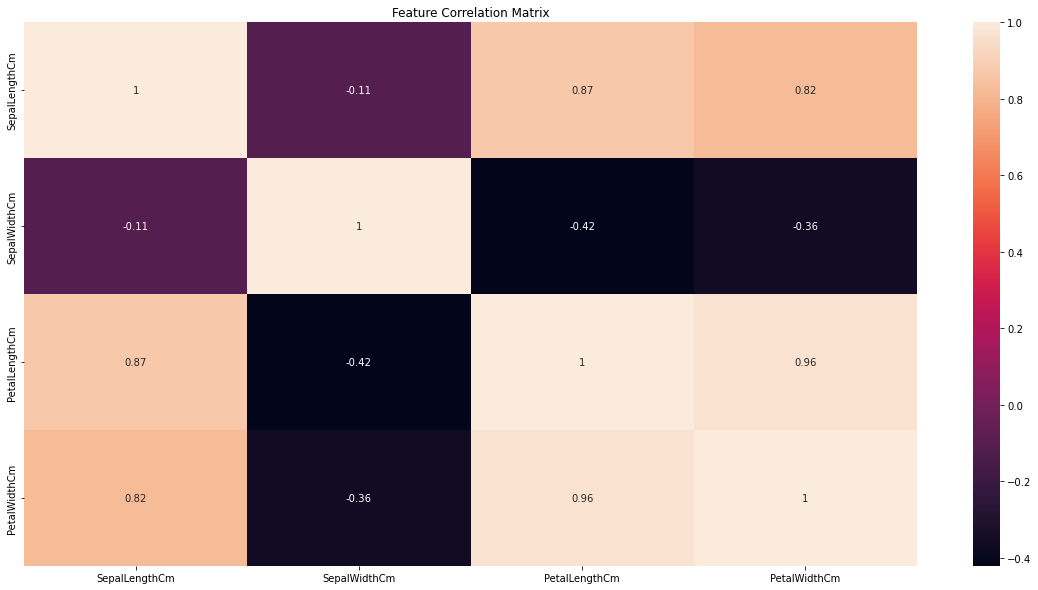

In [103]:
plt.figure(figsize=(20, 10))
corr_mat = df.corr()
cm = sns.heatmap(corr_mat, annot=True)
cm.set_title("Feature Correlation Matrix")
plt.show()

# Splitting the data into training and test sets

In [104]:
X = df.drop(['Species'], 1)
y = df['Species']

C:\Users\UTSAJH~1\AppData\Local\Temp/ipykernel_4400/2101582345.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop(['Species'], 1)


In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [106]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8


In [107]:
y_train.head()

60     Iris-versicolor
116     Iris-virginica
144     Iris-virginica
119     Iris-virginica
108     Iris-virginica
Name: Species, dtype: object

# Training the Decision Tree classifier

In [108]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", random_state=20)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=20)

# Evaluating the Decision Tree Classifier

In [109]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9777777777777777


In [110]:
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")

Confusion Matrix: 
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [111]:
print(f"Classification Report: \n\n{classification_report(y_test, y_pred)}")

Classification Report: 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



# Visualizing the Decision Tree classifier

In [112]:
features = df.columns[:-1]
classes = df['Species'].unique().tolist()

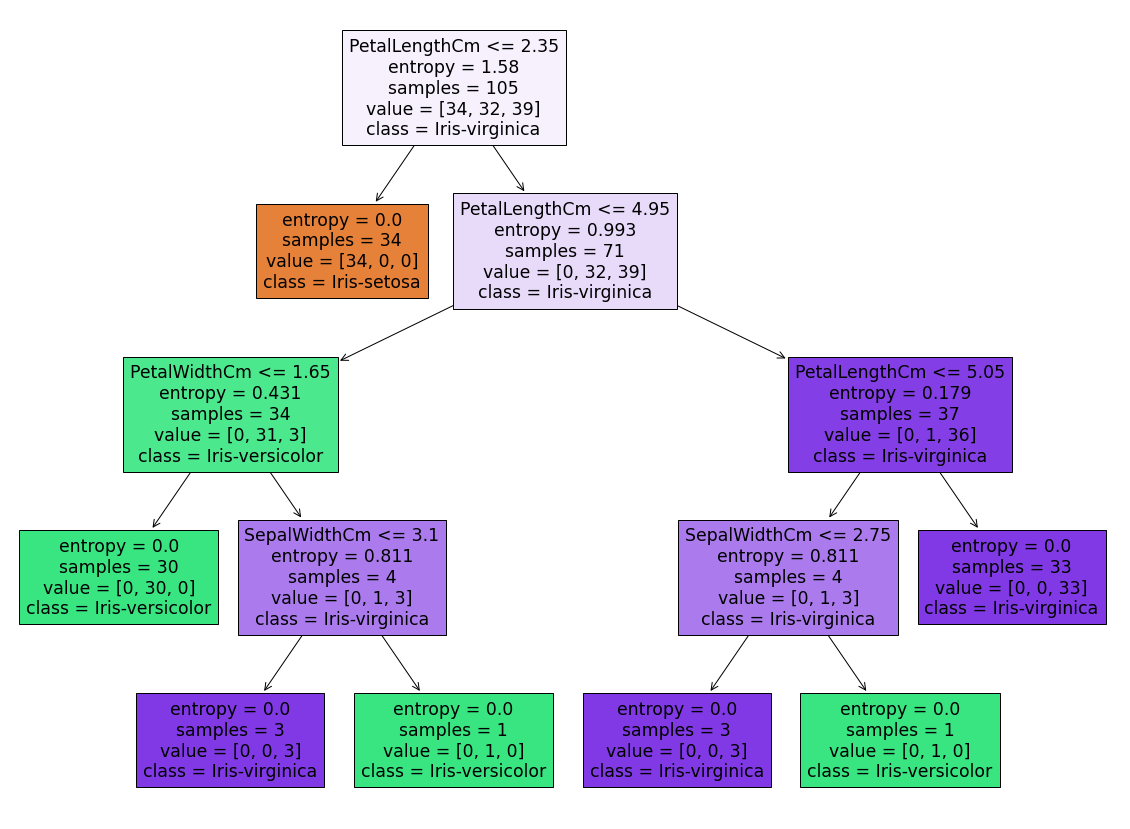

In [113]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 15))
plot_tree(classifier, feature_names=features, class_names=classes, filled=True)
plt.show()

# Testing predictions on sample data

In [126]:
test_pred1 = classifier.predict([[6, 5, 4.3, 3.3]])
print(test_pred1[0])

Iris-versicolor


C:\Users\utsaj haridwari\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [127]:
test_pred2 = classifier.predict([[7.5, 6.5, 7.8, 3.5]])
print(test_pred2[0])

Iris-virginica


C:\Users\utsaj haridwari\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [128]:
test_pred3 = classifier.predict([[4.1, 3.5, 1.8, 0.6]])
print(test_pred3[0])

Iris-setosa


C:\Users\utsaj haridwari\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
